# Métodos Computacionales


## Unidad 2: 

### Cálculo Numérico

- Diferenciación. 
- Integración.

### Taller.

**1** Teniendo en cuenta el análisis de error hecho para la primera derivada, realice el mismo análisis para la segunda derivada.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import scipy.integrate as integrate
 
def f(x): #f(x)
    return np.exp(np.sin(x))

def der1(x): #f'(X)
    return np.cos(x)*np.exp(np.sin(x))

def der2f(x): #f''(x)
    return (np.exp(np.sin(x))*(np.cos(x))**2 ) - np.exp(np.sin(x))*np.sin(x)

def deriv(f,a,method='centrada',h=1e-1):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atras':
        return (f(a) - f(a - h))/h 
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

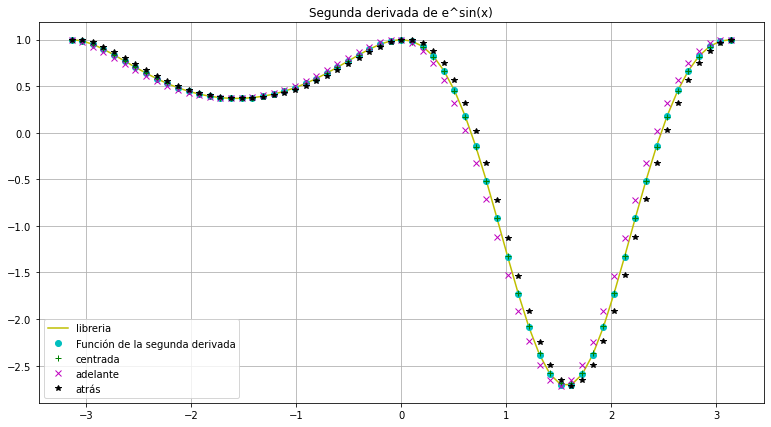

In [5]:
a=-np.pi
b=np.pi
h=0.1 #tamaño del paso 
N=round((b-a)/h) #redondear el resultado, el cual será la cantidad de datos
x = np.linspace(a,b,N)

d2=derivative(f,x,dx=0.01,n=2) #Segunda derivada usando la libreria
der2=der2f(x)                  #Segunda derivada usando la función de la segunda derivada
d2c=deriv(der1, x)             #Segunda derivada manual centrada 
d2ad=deriv(der1, x, method='adelante')    #Segunda derivada manual adelante
d2at=deriv(der1, x, method='atras')       #Segunda derivada manual atrás

plt.figure(figsize = (13,7))

plt.plot(x, d2, 'y', label='libreria')
plt.plot(x, der2, 'oc', label='Función de la segunda derivada')
plt.plot(x, d2c, '+g', label='centrada')
plt.plot(x, d2ad, 'xm', label='adelante')
plt.plot(x, d2at, '*k', label='atrás')
plt.title('Segunda derivada de e^sin(x)')
plt.grid()
plt.legend()

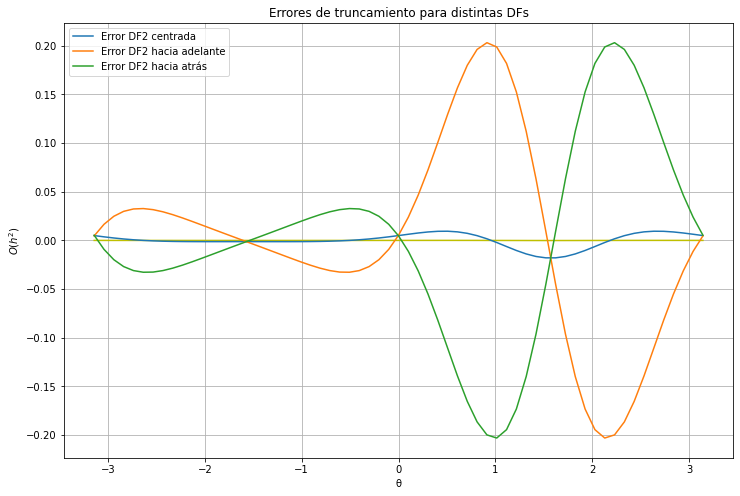

In [6]:
d_err=der2f(x)-d2
c_err=der2f(x)-d2c
ad_err=der2f(x)-d2ad
at_err=der2f(x)-d2at

plt.figure(figsize = (12, 8))
plt.plot(x,d_err, 'y', ) #solución analítica
plt.plot(x, c_err, label='Error DF2 centrada' )  
plt.plot(x,ad_err, label='Error DF2 hacia adelante')
plt.plot(x,at_err, label='Error DF2 hacia atrás')
plt.title('Errores de truncamiento para distintas DFs')
plt.ylabel('$O(h^2)$')
plt.xlabel('θ')
plt.grid()
plt.legend()
plt.show()

**2** La Ley de la conducción térmica de Fourier describe la difusión del calor. Situaciones en las que hay gradientes de calor, surge un flujo que tiende a homogeneizar la temperatura como consecuencia de colisiones de partículas dentro de un cuerpo. La Ley de Fourier está dando por

$$ q = -k\nabla T = -k\left( \frac{dT}{dx}\hat{i} + \frac{dT}{dy}\hat{j} + \frac{dT}{dz}\hat{k}\right)$$

donde T es la temperatura,  $\nabla T$ su gradiente y k es la conductividad del material. 

Grafique el flujo de calor en las cordenadas x y en la cordenada y si la temperatura es  $$ T(x,y) = x^3 + 3x-1+y^2  $$

In [24]:
k=0.1     #Acero
x=np.linspace(0,10,50)
y=np.linspace(0,10,50)

def q(x,y):
    
    def T(x, y):
        return x**3 + 3*x - 1 + y**2
    def Ty(y, x):
        return x**3 + 3*x - 1 + y**2
    dx=[]
    dy=[]
    for i in range (0,len(x)):
        k=x[i]
        ky=y[i]
        yt=tuple(y)
        xt=tuple(x)
        Dp=derivative(T, x, dx=1e-4,args=(ky))   
        Dx.append(Dp)
    for i in range (0,len(y)):
        ky=y[i]
        Dpy=derivative(Ty, y, dx=1e-4,args=(k))    
        Dy.append(Dpy)
    
    qq= -k*(dx+dy)
    
    return qq
    

In [25]:
#q(x,y)
plt.plot(q(x,y))

TypeError: T() argument after * must be an iterable, not numpy.float64

**3** Realice las siguientes integrales con los tres métodos vistos en clase y haga un análisis de error y tiempo de computo.

\begin{eqnarray*}
A.&\int_{\pi/2}^{0}cos(x)dx\\
B.&\int_{1}^{3}&\frac{1}{x^2}dx \\
C.&\int_{0}^{\pi/2}&(x^2+x+1)^2dx\\ 
D.&\int_{0}^{6.9}&cos(\frac{\pi}{2}x^2)dx 
\end{eqnarray*}

In [42]:
import time

def trap(f,a,b,n):
    h = 1 / float(n)
    intgr =0
    for i in range(1, int(n)):
        intgr+= 0.5 * h * (f(a+(i-1)*h) + f(a+i*h))

    #error_trapecio = (b-a)*(h^2)/12
    return intgr

def simpson1_3(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la x
        #x: valores entre [a,b] espaciados por h
        x = a + i * h
        # si es par se multiplica por 4
        if(i % 2 == 0): # i%2 : evalúa si "i" es divisible entre 2 el resultado es 0 (residuo de la división)
            suma = suma + 2 * f(x)
            #o
            #suma += 2* f(x,f)
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * f(x)
    #sumamos los el primer elemento y el ultimo
    suma = suma + f(a) + f(b)
    #Multiplicamos por h/3
    area = suma * (h / 3)

    #error_simpson1 = (h^5)/90
    #Retornamos el resultado
    return area


def simpson3_8(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = f(a)+f(b)
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la k
        #k = a - h + (2 * h * i)
        k = a + i * h

        if (i % 3 == 0): # i%3 : evalúa si "i" es divisible entre 3 el resultado es 0 (residuo de la división)
          suma += 2 * f(k)

        #en caso contrario se multiplica por 3
        else:
          suma += 3*f(k)
              
    #Multiplicamos por 3h/8
    area = suma * 3*(h / 8)

    #error_simpson2 = (b-a)*(h^4)/180
    #Retornamos el resultado
    return area

In [54]:
def f1(x):
    return np.cos(x)

b=np.pi/2
a=0
n=100

#Usar cada función con la integral 1 y se halla el tiempo de ejecución

ini=time.time()
s13_l=[]
for i in range(1, 21):
    n = 2**i
    s13 = simpson1_3(f, a, b, n)
    s13_l.append(s13)
    print(s13)
print('Solución integral con Simpson 1/3', s13)
fin=time.time()
print('Tiempo de ejecución Simpson 1/3:', fin-ini)

ini1=time.time()
s38_l=[]
for i in range(1, 21):
    n = 2**i
    s38 = simpson3_8(f, a, b, n)
    s38_l.append(s38)
    print(s38)
print('Solución integral con Simpson 3/8', s38)
fin1=time.time()
print('Tiempo de ejecución Simpson 3/8:',fin1-ini1)

ini2=time.time()
trap_l=[]
for i in range(1, 21):
    n = 2**i
    trap = simpson1_3(f, a, b, n)
    trap_l.append(trap)
    print(trap)
print('Solución integral con trapezoide', trap)
fin2=time.time()
print('Tiempo de ejecución trapezoide:', fin2-ini2)


x=np.linspace(np.pi/2, 0, 100)


1.0022798774922104
1.0001345849741938
1.0000082955239677
1.0000005166847066
1.0000000322650007
1.0000000020161288
1.0000000001260012
1.0000000000078755
1.0000000000004927
1.0000000000000313
1.0000000000000002
0.9999999999999991
1.0000000000000009
0.9999999999999989
0.9999999999999966
1.0000000000000073
1.0000000000000024
0.9999999999999765
1.000000000000015
Solución integral con Simpson 1/3 1.000000000000015
Tiempo de ejecución Simpson 1/3: 3.3488922119140625
0.9193047244525635
0.9805194110992042
0.9951683821471811
0.9987944387888674
0.9996987551714839
0.9999246978698444
0.9999811750345354
0.9999952937940731
0.9999988234507329
0.9999997058628207
0.9999999264657133
0.9999999816164298
0.9999999954041103
0.9999999988510225
0.9999999997127509
0.9999999999281942
0.9999999999820394
0.9999999999955399
0.9999999999989052
0.9999999999996966
Solución integral con Simpson 3/8 0.9999999999996966
Tiempo de ejecución Simpson 3/8: 5.724668025970459
1.0022798774922104
1.0001345849741938
1.000008295523

In [57]:
def f1(x):
    return 1/(x**2)

b=3
a=1
n=100

#Usar cada función con la integral 1 y se halla el tiempo de ejecución

ini=time.time()
s13_l=[]
for i in range(1, 21):
    n = 2**i
    s13 = simpson1_3(f, a, b, n)
    s13_l.append(s13)
    print(s13)
print('Solución integral con Simpson 1/3', s13)
fin=time.time()
print('Tiempo de ejecución Simpson 1/3:', fin-ini)

ini1=time.time()
s38_l=[]
for i in range(1, 21):
    n = 2**i
    s38 = simpson3_8(f, a, b, n)
    s38_l.append(s38)
    print(s38)
print('Solución integral con Simpson 3/8', s38)
fin1=time.time()
print('Tiempo de ejecución Simpson 3/8:',fin1-ini1)

ini2=time.time()
trap_l=[]
for i in range(1, 21):
    n = 2**i
    trap = simpson1_3(f, a, b, n)
    trap_l.append(trap)
    print(trap)
print('Solución integral con trapezoide', trap)
fin2=time.time()
print('Tiempo de ejecución trapezoide:', fin2-ini2)


x=np.linspace(np.pi/2, 0, 100)


-0.7047591789736251
-0.7006015865572524
-0.7003662891685629
-0.7003519284296883
-0.7003510361451372
-0.7003509804590538
-0.7003509769799476
-0.7003509767625241
-0.7003509767489353
-0.7003509767480859
-0.7003509767480331
-0.7003509767480294
-0.700350976748028
-0.7003509767480287
-0.700350976748033
-0.7003509767480276
-0.7003509767480258
-0.7003509767480303
-0.7003509767480202
-0.7003509767480287
Solución integral con Simpson 1/3 -0.7003509767480287
Tiempo de ejecución Simpson 1/3: 7.650679111480713
-0.6367990126401498
-0.5790386862120922
-0.6708899394978072
-0.6696517609095989
-0.692690785510873
-0.6926332685130137
-0.6984217836733939
-0.6984184645220479
-0.6998678523714167
-0.6998676491120661
-0.7002301448966313
-0.7002301322578998
-0.7003207656263974
-0.7003207648374913
-0.7003434237704066
-0.7003434237211165
-0.7003490884913061
-0.7003490884882234
-0.7003505046830835
-0.7003505046828851
Solución integral con Simpson 3/8 -0.7003505046828851
Tiempo de ejecución Simpson 3/8: 7.165515184

**4** Una varilla finita en el dominio $[a,b]$ con distribución de carga $\lambda(x)$ (carga por unidad de longitud). ¿Cuál es el potencial a una altura $z=d$ en $x=0$?

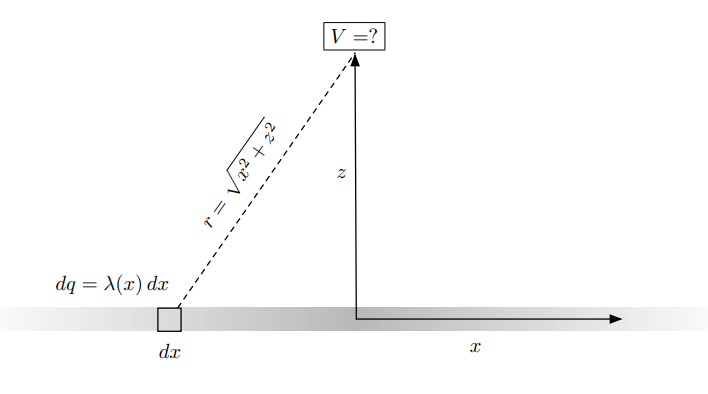

In [ ]:
a=0
b=50
z=100


**5** Realice un análisis similar al hecho en clase para un distribución de Bose-Einstein.

In [8]:
def fd(E):
    KT=1/40
    return 1/(np.exp((E)/KT)-1)

<ipython-input-8-b1224666d9dd>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.exp((E)/KT)-1)


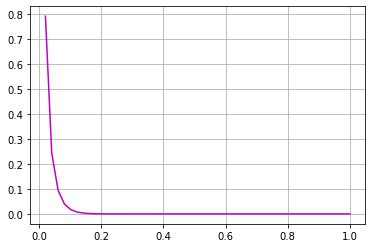

In [9]:
a=0
b=1
c=2
xd=np.linspace(a, b, 50)

plt.plot(xd, fd(xd),'m')
#plt.plot(xd, fd(xd, 0.5), 'y')
#plt.plot(xd, fd(xd, 0), 'c')
plt.grid()

In [12]:
integrate.quad(fd, 0.00001, 0.4)

(0.1956061472913612, 1.2370404356866293e-09)

In [ ]:
help(integrate.quad)